In [1]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
import numpy
from glob import glob
import matplotlib.pyplot as pyplot
from keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import os
%matplotlib inline
# changed from qt to inline

2023-04-04 10:01:17.924101: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 10:01:17.998091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 10:01:17.999785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 10:01:19.399789: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# classes_list=['Facial acne', 'Melanoma', 'Psoriasis', 'Ringworm', 'Skin Burn']
classes_list=['closed', 'no_yawn', 'open', 'yawn']
def printClassList():
    for class_name in classes_list:
        print(f"{classes_list.index(class_name)} -->  {class_name}")
printClassList()   
def getClassvalue(index):
    print(classes_list[index])

0 -->  closed
1 -->  no_yawn
2 -->  open
3 -->  yawn


In [3]:
IMAGE_SIZE=[180,180]
training_path=r'/home/corey/Documents/ML/train'
testing_path=r'/home/corey/Documents/ML/test'

In [4]:
VGG16_Architecture=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [5]:
VGG16_Architecture.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [6]:
for layer in VGG16_Architecture.layers:
    print(layer)
    layer.trainable=False

In [7]:
folders = '/home/corey/Documents/ML/train/' 
num_dirs = len([d for d in os.listdir(folders) if os.path.isdir(os.path.join(folders, d))])

# print(f'The number of directories in {folders} is {num_dirs}.')

In [8]:
x=Flatten()(VGG16_Architecture.output)

In [9]:
x

<KerasTensor: shape=(None, 12800) dtype=float32 (created by layer 'flatten')>

In [10]:
prediction=Dense(num_dirs,activation='softmax')(x)

In [11]:
prediction

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'dense')>

In [12]:
model=Model(inputs=VGG16_Architecture.input,outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)


In [15]:
# train_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, data_format='channels_last')
train_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, preprocessing_function=lambda img: tf.image.resize(img, IMAGE_SIZE))
test_data_generator=ImageDataGenerator(rescale=1./255, preprocessing_function=lambda img: tf.image.resize(img, IMAGE_SIZE))


In [16]:
train_data_generator

In [17]:
test_data_generator=ImageDataGenerator(rescale=1./255)

In [18]:
training_set=train_data_generator.flow_from_directory(training_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')


Found 2900 images belonging to 4 classes.


In [19]:
testing_set=test_data_generator.flow_from_directory(testing_path,target_size=IMAGE_SIZE,batch_size=32,class_mode='categorical')

Found 36 images belonging to 4 classes.


In [20]:
training_set.labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [21]:
len(training_set)

91

In [22]:
len(testing_set)

2

In [23]:
model.fit(
    training_set,
    validation_data=testing_set,
    epochs=3,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Epoch 1/3


2023-04-04 10:01:24.376515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.8041

2023-04-04 10:12:02.192525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 647s 7s/step - loss: 0.3974 - accuracy: 0.8041 - val_loss: 2.7080 - val_accuracy: 0.2500
Epoch 2/3
91/91 [==============================] - 598s 7s/step - loss: 0.1844 - accuracy: 0.9259 - val_loss: 2.8347 - val_accuracy: 0.2500
Epoch 3/3
91/91 [==============================] - 602s 7s/step - loss: 0.1398 - accuracy: 0.9514 - val_loss: 3.0533 - val_accuracy: 0.2500


In [24]:
model.save("./Models/Predefine_Architecture_VGG16_Model.h5")

In [35]:
VGG16_model=load_model("./Models/Predefine_Architecture_VGG16_Model.h5")

In [41]:
test_prediction=model.predict(testing_set)

2023-04-04 14:10:38.939480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 78s 9s/step


In [37]:
test_prediction

array([[1.5013079e-01, 2.1925047e-03, 6.3228738e-01, 2.1538925e-01],
       [9.6180725e-01, 1.3987541e-02, 2.0573014e-02, 3.6322169e-03],
       [3.4497413e-01, 6.3848740e-01, 1.3435554e-02, 3.1029154e-03],
       [5.0506000e-03, 4.2609358e-04, 9.7031516e-01, 2.4208110e-02],
       [5.0506000e-03, 4.2609358e-04, 9.7031516e-01, 2.4208110e-02],
       [8.9489704e-01, 1.9485872e-02, 7.7781744e-02, 7.8354832e-03],
       [4.2537740e-03, 9.2484868e-01, 2.0075727e-02, 5.0821729e-02],
       [9.6180725e-01, 1.3987541e-02, 2.0573014e-02, 3.6322169e-03],
       [1.5013079e-01, 2.1925047e-03, 6.3228738e-01, 2.1538925e-01],
       [9.3246496e-01, 1.4647127e-03, 6.5306872e-02, 7.6348259e-04],
       [3.2424036e-02, 8.9521629e-01, 6.6907816e-02, 5.4518445e-03],
       [5.0506000e-03, 4.2609358e-04, 9.7031516e-01, 2.4208110e-02],
       [9.3246496e-01, 1.4647127e-03, 6.5306872e-02, 7.6348259e-04],
       [9.6180725e-01, 1.3987541e-02, 2.0573014e-02, 3.6322169e-03],
       [3.4497413e-01, 6.3848740e-

In [28]:
predicted_values=[numpy.argmax(result) for result in test_prediction]

In [29]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",testing_set.labels[i])

1  - >  0
2  - >  0
0  - >  0
1  - >  0
0  - >  0
0  - >  0
0  - >  0
2  - >  0
1  - >  0
2  - >  1
2  - >  1
1  - >  1
0  - >  1
1  - >  1
1  - >  1
2  - >  1
1  - >  1
0  - >  1
1  - >  2
2  - >  2
1  - >  2
0  - >  2
1  - >  2
1  - >  2
0  - >  2
1  - >  2
2  - >  2
2  - >  3
0  - >  3
1  - >  3
1  - >  3
0  - >  3
1  - >  3
1  - >  3
0  - >  3
0  - >  3


In [30]:
confusion_matrix_data=confusion_matrix(predicted_values,testing_set.labels)

In [31]:
confusion_matrix_data

array([[4, 2, 2, 4],
       [3, 4, 5, 4],
       [2, 3, 2, 1],
       [0, 0, 0, 0]])

<AxesSubplot:>

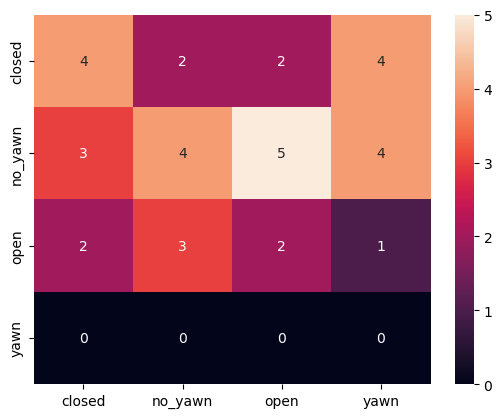

In [32]:
pyplot.figure('Confusion Matrix')
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [33]:
classification_report_data=classification_report(predicted_values,testing_set.labels,target_names=classes_list)

/home/corey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/corey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/corey/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(classification_report_data)

              precision    recall  f1-score   support

      closed       0.44      0.33      0.38        12
     no_yawn       0.44      0.25      0.32        16
        open       0.22      0.25      0.24         8
        yawn       0.00      0.00      0.00         0

    accuracy                           0.28        36
   macro avg       0.28      0.21      0.23        36
weighted avg       0.40      0.28      0.32        36

